# Klasifikasi Gambar
Dicoding <br>
└─ Path: Machine Learning <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└─ Course: Belajar Machine Learning untuk Pemula <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└─ Submission: Klasifikasi Gambar

## Install libraries

In [1]:
#%pip install wget
%pip install tqdm
%pip install rembg

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Download Dataset

In [2]:
import os
from tqdm import tqdm

# Set the URL and filename of the dataset
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
filename = url.split("/")[-1]

# # Using wget module (3rd party module) recommended by submission
# import wget

# # Download dataset if not exist in system
# if not os.path.exists(filename):
#   print("Downloading...")
#   wget.download(url, out=filename)
#   print("Download completed")
# else:
#   print("file already downloaded")


# Alternative using built-in module (requests)
import requests

# Download dataset if not exist in system
if not os.path.exists(filename):
  # Make a GET request to the URL to download the dataset
  response = requests.get(url, stream=True)

  # Get the total size of the file
  total_size = int(response.headers.get("content-length", 0))

  # Downloading the file
  print("Downloading...")
  with tqdm(total=total_size, unit="B", unit_scale=True) as progress_bar:
      with open(filename, "wb") as file:
          for data in response.iter_content(1024): # 1024 = 1 Byte
              progress_bar.update(len(data))
              file.write(data)

  # Check if the total size of the downloaded file matches the expected size
  if total_size != 0 and progress_bar.n != total_size:
      raise RuntimeError("\nCould not download file")
  else:
    print(f"\nDownload completed")
else:
    print("file already downloaded")

Downloading...


100%|██████████| 323M/323M [04:31<00:00, 1.19MB/s]    


Download completed


## Unpack Dataset

In [3]:
import zipfile

# Get dataset structure folders and save it to dataset_dirs list
dataset_dirs = []
with zipfile.ZipFile(filename) as myzip:
  for member in myzip.namelist():
    if member.endswith("/"):
      dataset_dirs.append(member)

# Sort the dataset_dirs list in ascending order
dataset_dirs.sort()

# Print the directory structure
print(f"<index>\tDirectory Name")
for i in range(len(dataset_dirs)):
  print(f"<{i}>\t{dataset_dirs[i]}")

<index>	Directory Name
<0>	rockpaperscissors/
<1>	rockpaperscissors/paper/
<2>	rockpaperscissors/rock/
<3>	rockpaperscissors/rps-cv-images/
<4>	rockpaperscissors/rps-cv-images/paper/
<5>	rockpaperscissors/rps-cv-images/rock/
<6>	rockpaperscissors/rps-cv-images/scissors/
<7>	rockpaperscissors/scissors/


Train data details:
paper = 712 photos
rock = 726 photos
scissors = 750 photos
----------------------
Total = 2188 photos

Random dataset from each folder:


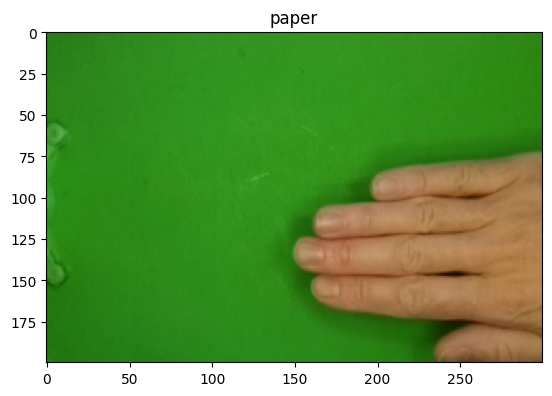

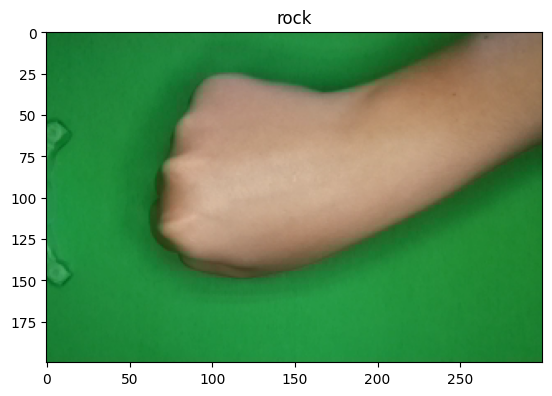

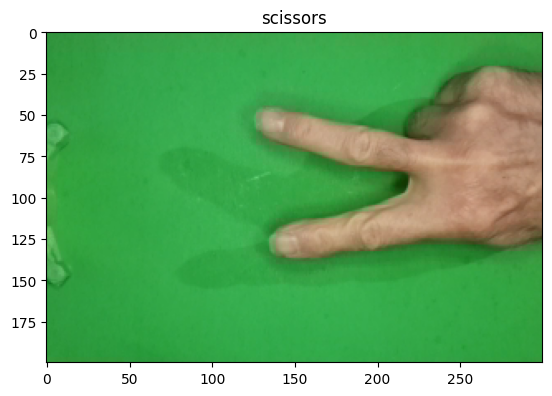

In [4]:
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image

# Choose which directories to extract from the dataset
chosen_dirs_index = [1, 2, 7]

# Create a list of classes from the chosen sub-directory names
classes = [dataset_dirs[i].split("/")[-2] for i in chosen_dirs_index]

# Create a new directory (if not exist) to store the extracted data
os.makedirs("Original", exist_ok=True)
train_dir = "Original"

# Extract the chosen data from the zip file (4 steps)
# 1. Create a temporary directory to store the extracted data
os.makedirs("temp", exist_ok=True)

# 2. Unzip all data from the zip file to the temporary directory
with zipfile.ZipFile(filename) as myzip:
    myzip.extractall("temp")

# 3. Move the chosen data from the temporary directory to the train directory
if len(os.listdir(train_dir)) == 0:
    for i in chosen_dirs_index:
        shutil.move(src=os.path.join("temp", dataset_dirs[i]), dst=train_dir)

# 4. Delete the temporary directory
shutil.rmtree("temp")

# Get the details (number of photos from each class) of the training data
print("Train data details:")
total = 0
for subfolder in sorted(os.listdir(train_dir)):
    count = len(os.listdir(os.path.join(train_dir, subfolder)))
    print(f"{subfolder} = {count} photos")
    total += count
print(f"----------------------\nTotal = {total} photos")

# Show a random image from each sub-folder (class)
print("\nRandom dataset from each folder:")
for subfolder in sorted(os.listdir(train_dir)):
  folder_path = os.path.join(train_dir, subfolder)
  file_list = os.listdir(folder_path)
  random_file = random.choice(file_list)
  random_image_path = os.path.join(folder_path, random_file)
  img = Image.open(random_image_path)
  plt.imshow(img)
  plt.title(subfolder)
  plt.show()

## Data Preprocessing - Remove background

100%|#####################################| 44.2M/44.2M [00:00<00:00, 22.1GB/s]
100%|██████████| 750/750 [05:19<00:00,  2.35it/s]


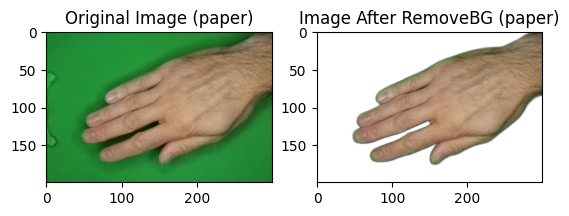

In [5]:
from rembg import remove, new_session

# Function to remove the background from images in a directory
def removeBgImages(inputDir, outputDir):
  # Create the output directory if it does not exist
  os.makedirs(outputDir, exist_ok=True)

  # Get a list of all subdirectories in the input directory
  subdirectories = [os.path.join(inputDir, d) for d in os.listdir(inputDir) if os.path.isdir(os.path.join(inputDir, d))]

  # Iterate over each subdirectory
  for subdirectory in subdirectories:

    # Create a copy of the subdirectory in the output directory if it does not exist
    os.makedirs(subdirectory.replace(inputDir,outputDir), exist_ok=True)

    # Get a list of all image files (with '.png', '.jpg', '.jpeg' extensions) in the subdirectory
    image_files = [os.path.join(subdirectory, f) for f in os.listdir(subdirectory) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Set up a remBg session (recommended for removeBg operation using a lot of images)
    model_name = "silueta"
    rembg_session = new_session(model_name)

    # Iterate over each image file and show a progress bar using tqdm
    for image_file in tqdm(image_files):

      # Define the output file name
      output_file_name = f'removed_bg_{os.path.basename(image_file)}'

      # Define the output file path
      output_file_path = os.path.join(subdirectory.replace(inputDir,outputDir,1), output_file_name)

      # Check if the output file is already exist (to skip removeBg operation if it has already been run)
      if os.path.exists(output_file_path):
        continue

      # Open the original image
      original_image = Image.open(image_file)

      # Remove the background from the image
      removed_bg_image = remove(original_image, session=rembg_session)

      # Save the removed background image to output path
      removed_bg_image.save(output_file_path)


# Function to show a random image after removing the background
def show_random_image_after_removebg(input_directory, output_directory):
    subfolder = random.choice(os.listdir(input_directory))
    input_folder_path = os.path.join(input_directory, subfolder)
    output_folder_path = os.path.join(output_directory, subfolder)
    file_list = os.listdir(input_folder_path)
    random_file = random.choice(file_list)
    input_image_path = os.path.join(input_folder_path, random_file)
    output_image_path = os.path.join(output_folder_path, f'removed_bg_{random_file}')
    original_img = Image.open(input_image_path)
    removed_bg_img = Image.open(output_image_path)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_img)
    axs[0].set_title(f"Original Image ({subfolder})")
    axs[1].imshow(removed_bg_img)
    axs[1].set_title(f"Image After RemoveBG ({subfolder})")
    plt.show()

# Remove the background from the training data images
removeBgImages(train_dir,"RemovedBg")

# Show a random image after removing the background
show_random_image_after_removebg(train_dir, "RemovedBg")

# Use the removed background images as the training data
train_dir = "RemovedBg"

## Preparing the Train and Validation data



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and batch size
img_width = 150
img_height = 150
batch_size = 16

# Prepare data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale the images pixel to range [0 - 1]
    rotation_range=20,      # Randomly rotate images by 20 degrees
    shear_range=0.20,       # Randomly apply shearing transformations
    zoom_range=0.20,        # Randomly zoom in or out images by 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode = 'nearest',  # Fill in any new pixels created by the transformations with the nearest pixel
    validation_split=0.4)   # Set aside 40% of the data for validation

print(f"Training data:")

# Generate training data with data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,                            # Directory of training data
    target_size=(img_width, img_height),  # Resize the images
    batch_size=batch_size,                # Specify the number of images in each batch
    shuffle=True,                         # Shuffle the data
    seed=69,                              # Set a random seed for reproducibility
    class_mode='categorical',             # The type of labels (categorical for multi-class classification)
    subset='training')                    # Indicate that this is the training data

# Preparing validation data (no augmentation, just rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4)

print(f"\nValidation data:")

# Generate validation data without data augmentation
validation_generator = validation_datagen.flow_from_directory(
    train_dir,                      # Same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=69,
    class_mode='categorical',
    subset='validation')            # Indicate that this is the validation data

print("\nclasses:\n", train_generator.class_indices)

Training data:
Found 1314 images belonging to 3 classes.

Validation data:
Found 874 images belonging to 3 classes.

classes:
 {'paper': 0, 'rock': 1, 'scissors': 2}


## Make Model's Structure

In [7]:
import tensorflow as tf

# Create a sequential model
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_width, img_height, 3)), # Channel: 3 for rgb, 1 for grayscale
    tf.keras.layers.MaxPooling2D(2, 2), # Max pooling layer with pool size 2x2

    # Hidden Layer 1
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # Convolutional layer with 128 filters, kernel size 3x3, and ReLU activation function
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25), # Dropout layer with rate 0.25 to prevent overfitting

    # Hidden Layer 2
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Hidden Layer 3
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Output layer
    tf.keras.layers.Flatten(), # Flatten the 2D arrays to 1D
    tf.keras.layers.Dense(512, activation='relu'), # Fully connected layer with 512 neurons
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax') # Fully connected layer with 3 neurons (for 3 classes)
])

# Print the summary of the model
model.summary()

c:\Users\Aldi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,398,083 (54.92 MB)

 Trainable params: 14,398,083 (54.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(
    loss=tf.losses.CategoricalCrossentropy(), # Set loss function
    optimizer=tf.optimizers.Adam(),           # Set optimizer
    metrics=['accuracy']                      # Set the metrics to monitor
    )

## Training Model

In [9]:
import time

# Record the start time of the training process
start_time = time.time()

# Define the number of epochs for training
n_epoch = 20

# Train the model
trainingHistory = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = n_epoch)

# Record the end time of the training process
end_time = time.time()

# Calculate the total time spent on training
timeSpent = round(end_time - start_time,3)

# Print the training results
print("\nResult:")
print(f"Training Time = {int(timeSpent//60)} minutes {int(timeSpent%60)} seconds or {int(timeSpent)} seconds")
print(f"Accuracy = {trainingHistory.history['accuracy'][n_epoch-1]}")

Epoch 1/20


c:\Users\Aldi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 541ms/step - accuracy: 0.4419 - loss: 1.0494 - val_accuracy: 0.8854 - val_loss: 0.3363
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.7873 - val_accuracy: 0.7000 - val_loss: 0.6405
Epoch 3/20


c:\Users\Aldi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 428ms/step - accuracy: 0.8347 - loss: 0.4546 - val_accuracy: 0.9190 - val_loss: 0.2368
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.9375 - loss: 0.3938 - val_accuracy: 0.8000 - val_loss: 0.6206
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 430ms/step - accuracy: 0.8984 - loss: 0.2915 - val_accuracy: 0.9363 - val_loss: 0.1966
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9375 - loss: 0.1258 - val_accuracy: 1.0000 - val_loss: 0.1259
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 433ms/step - accuracy: 0.9062 - loss: 0.2513 - val_accuracy: 0.9352 - val_loss: 0.1951
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9375 - loss: 0.1890 - val_accuracy: 0.9000 - val_loss: 0.1813
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 431ms/step - accuracy: 0.9043 - loss: 0.2328 - val_accuracy: 0.9248 - val_loss: 0.2331
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9375 - loss: 0.2168 - val_accuracy: 1.0000 -

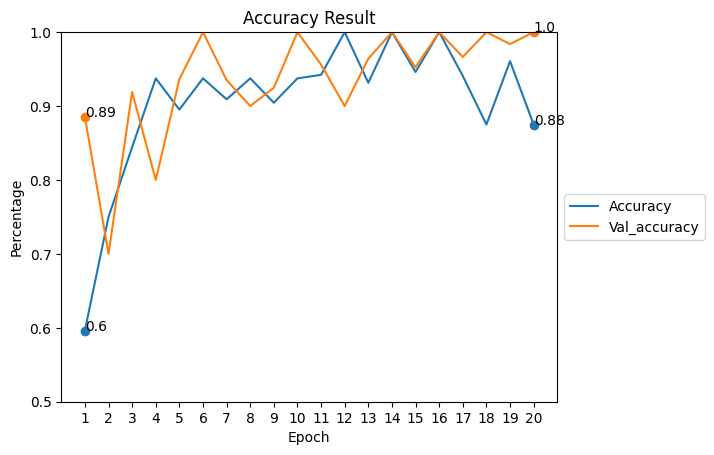

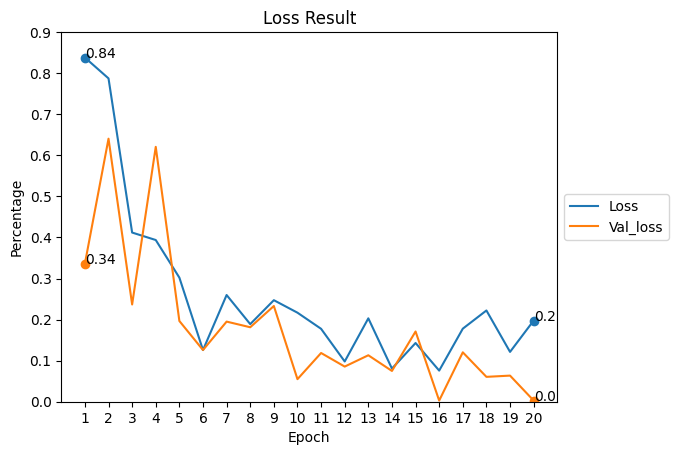

In [10]:
import matplotlib.pyplot as plt

# Function to add a dot and text to a line graph
def addDotAndText(coordinate, text, color):
  plt.scatter(coordinate[0],coordinate[1], color=color) # Plot a dot on line graph
  plt.text(coordinate[0],coordinate[1], round(text,2))  # Plot text on line graph


# Function to plot two lines on a graph
def plot2LinesGraph(points, labels, preference, title):
  # Plotting the first line
  plt.plot(points[0][0], points[0][1], label=labels[0])

  # Plotting the first line
  plt.plot(points[1][0], points[1][1], label=labels[1])

  # Setting the x-axis and y-axis range
  plt.xlim(0, points[0][0][-1] + 1)
  if preference == 'higher':
    ymin = round(min(points[0][1] + points[1][1]) - 0.05, 1)
    ymax = 1.0
    plt.ylim(ymin, ymax)
  elif preference == 'lower':
    ymin = 0
    ymax = round(max(points[0][1] + points[1][1]) + 0.05, 1)
    plt.ylim(ymin, ymax)

  # Naming and setting the ticks for the x-axis
  plt.xlabel('Epoch')
  plt.xticks(points[0][0])

  # Naming and setting the ticks for the y-axis
  plt.ylabel('Percentage')
  plt.yticks([i/10 for i in range(int(ymin*10), int(ymax*10+1))])

  # Add a dot and text at the start and end of each line
  startLine1 = addDotAndText([points[0][0][0], points[0][1][0]], round(points[0][1][0],2), '#1f77b4')
  startLine2 = addDotAndText([points[1][0][0], points[1][1][0]], round(points[1][1][0],2), '#ff7f0e')
  endLine1 = addDotAndText([points[0][0][-1], points[0][1][-1]], round(points[0][1][-1],2), '#1f77b4')
  endLine2 = addDotAndText([points[1][0][-1], points[1][1][-1]], round(points[1][1][-1],2), '#ff7f0e')

  # Giving a title to the graph
  plt.title(title)

  # Show a legend on the plot
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  # Display the plot
  plt.show()


# Define the data points
x1 = x2 = x3 = x4 = [i+1 for i in range(n_epoch)]
y1 = trainingHistory.history['accuracy']
y2 = trainingHistory.history['val_accuracy']
y3 = trainingHistory.history["loss"]
y4 = trainingHistory.history["val_loss"]

# Plot the accuracy graph and the loss graph
accuracyPlot = plot2LinesGraph([[x1,y1],[x2,y2]],["Accuracy","Val_accuracy"],"higher","Accuracy Result")
print("\n\n")
lossPlot = plot2LinesGraph([[x3,y3],[x4,y4]],["Loss","Val_loss"],"lower","Loss Result")

In [11]:
import pickle

# Save the model as a pickle file
savedModel = "rockPaperScissors_image_classifier_model.pkl"
with open(savedModel, 'wb') as file:
    pickle.dump(model, file)

# # Load model from pickle file
# with open(savedModel, 'rb') as file:
#     loadedModel = pickle.load(file)

## Testing Model

In [12]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
%matplotlib inline

# Upload images
uploaded_images = files.upload()

# Iterate over the uploaded images:
for uploaded_image in uploaded_images.keys():
  # Load the image and resize it
  img = image.load_img(uploaded_image, target_size=(img_width, img_height))
  # Show the image
  plt.imshow(img)

  # Convert the image to a numpy array
  x = image.img_to_array(img)
  # Expand the dimensions of the array to match the expected input shape for the model
  x = np.expand_dims(x, axis=0)
  # Stack the array into a batch of images
  images = np.vstack([x])

  # Predict the class of the uploaded image Using the trained model
  imgClass = model.predict(images)
  # Convert the probability distribution to a list
  probClass = list(imgClass[0])
  # Find the index of the maximum value (predicted class)
  max_index = probClass.index(max(probClass))

  # Print the probability distribution and predicted class
  print(f"\nProbability distribution of classes:\n{dict(zip(classes,probClass))}")
  print(f"\nPredicted Class = {classes[max_index]}\n")

  # Delete the uploaded image
  os.remove(uploaded_image)

ModuleNotFoundError: No module named 'google.colab'